<a href="https://colab.research.google.com/github/jelincovil/fund_multitudes_proceso_constituyente_cl/blob/main/Analisis_de_interacciones_Fundacion_Multitudes_(Py).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>




# Analisis de Datos
**Resumen**


### Modulos utilizados

In [ ]:
pip install dplython

In [ ]:
pip install plotnine

In [56]:
import pandas as pd
import numpy as np

from dplython import (DplyFrame, X, diamonds, select, sift,
  sample_n, sample_frac, head, arrange, mutate, group_by,
  summarize, DelayFunction)

from plotnine import ggplot, geom_point, aes, stat_smooth, facet_wrap, geom_boxplot, labs, xlab,  ylab, ggtitle, stat_summary, theme, coord_flip, geom_histogram, scale_y_continuous, scale_x_continuous, geom_freqpoly, geom_density, geom_violin, geom_col, position_dodge, geom_text, lims, geom_line

### Lectura de la base de datos


In [57]:
# Reemplzar direcciones a proyecto yuio
#
#

# timeline rechazo y apruebo
time_apruebo = pd.read_csv('https://raw.githubusercontent.com/jelincovil/data_sets_teaching/main/TT_apruebo_timeline_0604_1506.csv', sep=',')
time_rechazo = pd.read_csv('https://raw.githubusercontent.com/jelincovil/data_sets_teaching/main/TT_rechazo_timeline_0604_1506.csv', sep = ',')
time_constitucion = pd.read_csv('https://raw.githubusercontent.com/jelincovil/data_sets_teaching/main/TT_constitucion_timeline_0604_1506.csv', sep = ',')
# Cambio a tibbles
time_apruebo = DplyFrame(time_apruebo)
time_rechazo = DplyFrame(time_rechazo)
time_constitucion = DplyFrame(time_constitucion)

## Análisis exploratorio y numérico de 


In [58]:
# Visualizamos dataframe
time_apruebo.head(5)

,TIMESTAMP,DATE_TIME_UTC,COUNT,RELATIVE_SENTIMENT
0,1649203200,2022-04-06 00:00:00 +00:00,5444,0
1,1649246400,2022-04-06 12:00:00 +00:00,13468,0
2,1649289600,2022-04-07 00:00:00 +00:00,4756,0
3,1649332800,2022-04-07 12:00:00 +00:00,2144,0
4,1649376000,2022-04-08 00:00:00 +00:00,1180,0


In [59]:
time_apruebo = time_apruebo >> mutate(time = pd.Series(range(1,141)) )

/usr/local/lib/python3.7/dist-packages/plotnine/geoms/geom_path.py:75: PlotnineWarning: geom_path: Removed 1 rows containing missing values.


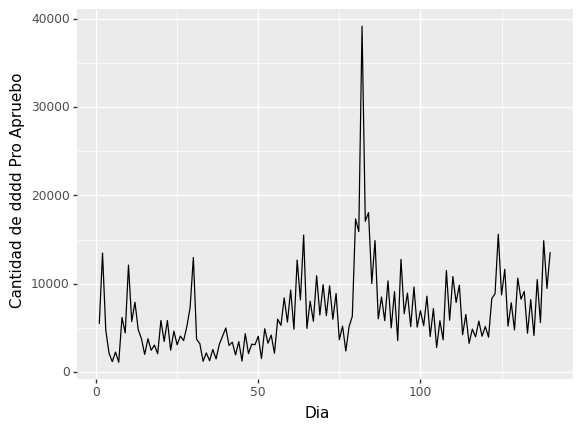

<ggplot: (8771772073805)>

In [60]:
(
    ggplot(time_apruebo, aes(x='time', y='COUNT'))
    + geom_line() # line plot
    + labs(x='Dia', y=' Cantidad de dddd Pro Apruebo')
) 

In [61]:
time_rechazo = time_rechazo >> mutate(time = pd.Series(range(1,141)) )

/usr/local/lib/python3.7/dist-packages/plotnine/geoms/geom_path.py:75: PlotnineWarning: geom_path: Removed 1 rows containing missing values.


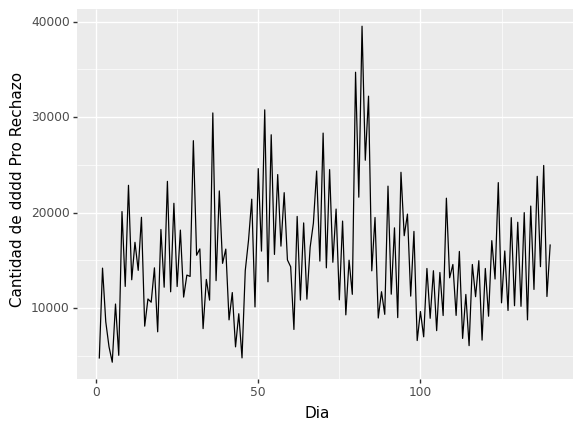

<ggplot: (8771779126009)>

In [62]:
(
    ggplot(time_rechazo, aes(x='time', y='COUNT'))
    + geom_line() # line plot
    + labs(x='Dia', y=' Cantidad de dddd Pro Rechazo')
) 

Analisis de relacion: Graficas

In [63]:
time_constitucion = time_constitucion >> mutate(time = pd.Series(range(1,141)) )

/usr/local/lib/python3.7/dist-packages/plotnine/geoms/geom_path.py:75: PlotnineWarning: geom_path: Removed 1 rows containing missing values.


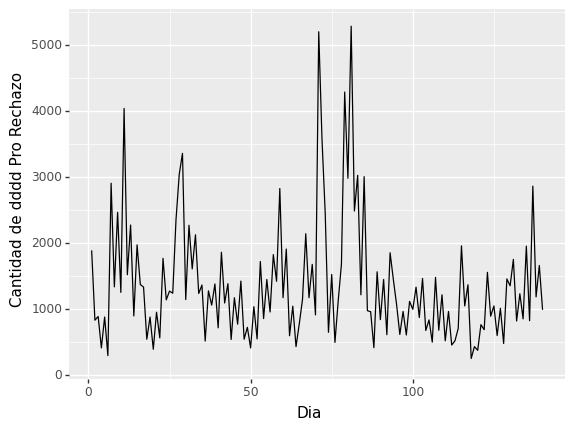

<ggplot: (8771748925009)>

In [64]:
(
    ggplot(time_constitucion, aes(x='time', y='COUNT'))
    + geom_line() # line plot
    + labs(x='Dia', y=' Cantidad de dddd Pro Rechazo')
) 

# Falta determinar las fechas de los maximos


## Analisis de interacciones 

In [65]:
# timeline rechazo y apruebo
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# modulo de networks
import networkx as nx
url1 = 'https://raw.githubusercontent.com/jelincovil/fund_multitudes_proceso_constituyente_cl/main/datos%20y%20figuras/TT_apruebo_gephi_0604_1506.csv'
url2 = 'https://raw.githubusercontent.com/jelincovil/fund_multitudes_proceso_constituyente_cl/main/datos%20y%20figuras/TT_constitucion_gephi_0604_1506.csv'
url3 = 'https://raw.githubusercontent.com/jelincovil/fund_multitudes_proceso_constituyente_cl/main/datos%20y%20figuras/TT_rechazo_gephi_0604_1506.csv'
net1 = pd.read_csv(url1, sep=',')
net2 = pd.read_csv(url2, sep = ',')
net2 = pd.read_csv(url3, sep = ',')


# Interaccion #Apruebo

### Full general interaccion para weight>10

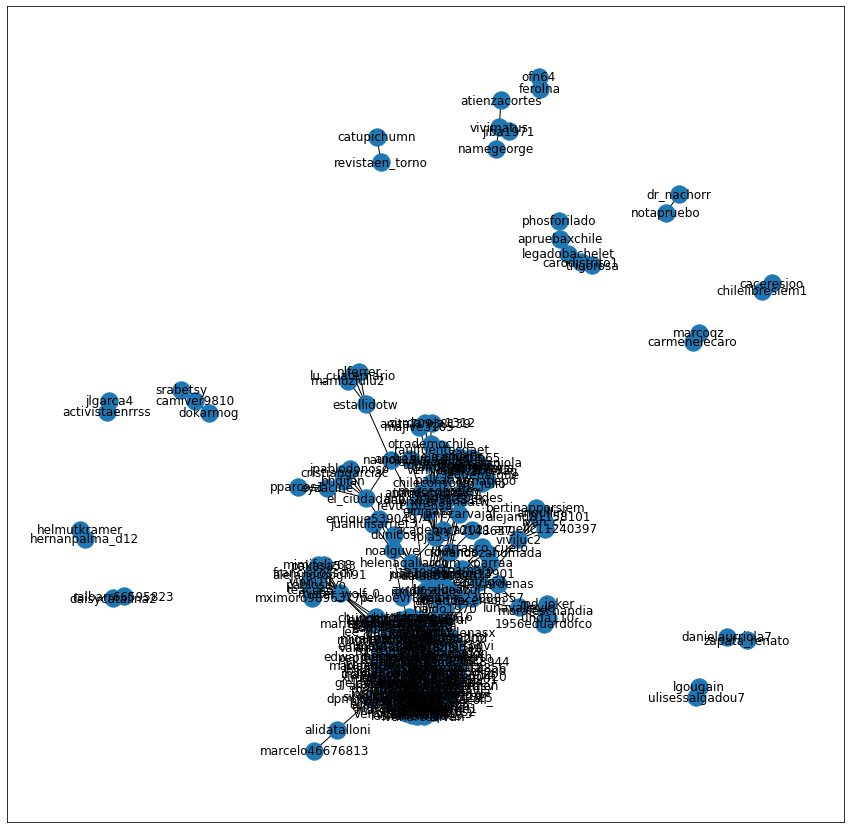

In [66]:
G11 = nx.from_pandas_edgelist( net1[net1['WEIGHT']>10],
                             source = 'FROM',
                             target = 'TO',
                             edge_attr = 'WEIGHT' )

plt.figure(3,figsize=(15,15)) 
nx.draw_networkx(G11, pos=nx.spring_layout(G11))
plt.show()

In [67]:
net1 = net1[net1['WEIGHT']>15]
net1.shape

(124, 3)

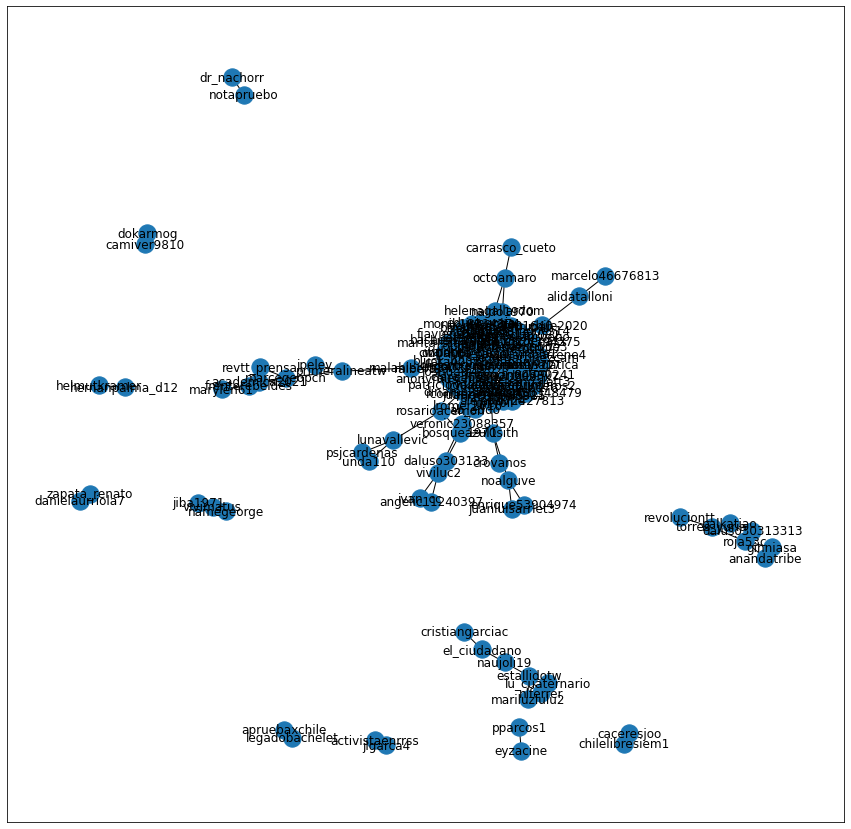

In [68]:
G12 = nx.from_pandas_edgelist( net1,
                             source = 'FROM',
                             target = 'TO',
                             edge_attr = 'WEIGHT' )

plt.figure(3,figsize=(15,15)) 
nx.draw_networkx(G12, pos=nx.spring_layout(G12))
plt.show()

In [69]:
print(nx.info(G12))
print('# of edges: {}'.format(G12.number_of_edges()))
print('# of nodes: {}'.format(G12.number_of_nodes()))

Graph with 130 nodes and 124 edges
# of edges: 124
# of nodes: 130


In [70]:
nx.is_k_edge_connected(G12, k=1)
# https://networkx.org/documentation/stable/reference/algorithms/connectivity.html

False

In [71]:
from networkx.algorithms.connectivity.edge_kcomponents import bridge_components
sorted(map(sorted, bridge_components(G12)))

[['1970sith',
  'ab_eddo',
  'bosqueazul1',
  'helenagallardom',
  'hugoguionista',
  'lromer2016',
  'naldo1970',
  'octoamaro',
  'rosarioacemon'],
 ['academica2021', 'frenterebeldes', 'marcegeopch'],
 ['activistaenrrss'],
 ['alecelish'],
 ['alejand72427813'],
 ['alexornis5'],
 ['alidatalloni'],
 ['anamari50348479'],
 ['anandatribe'],
 ['angelic11240397'],
 ['anonymuschileno'],
 ['apruebaxchile'],
 ['basaesvaldivia'],
 ['bluck_bony'],
 ['brnalillo'],
 ['caceresjoo'],
 ['camiver9810'],
 ['carlosramones14'],
 ['caroamadrid'],
 ['carrasco_cueto'],
 ['cata42335233'],
 ['chilelibresiem1'],
 ['chuncho_de_'],
 ['cidpatita'],
 ['clara36138202'],
 ['copihua85'],
 ['cristiangalett3'],
 ['cristiangarciac'],
 ['crovanos'],
 ['cyndi_gon'],
 ['daluso303133'],
 ['daluso30313313', 'palkatiao', 'roja53c', 'torres_yuria'],
 ['danielaurriola7'],
 ['dinamo2580'],
 ['dokarmog'],
 ['dpm_chile2020'],
 ['dr_nachorr'],
 ['edumartinezcam'],
 ['eduringraja'],
 ['el_ciudadano'],
 ['enrique53904974'],
 ['estalli

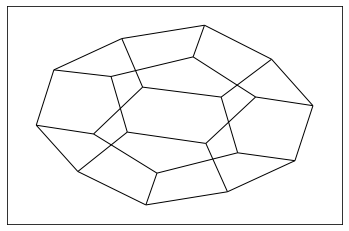

In [72]:
G = nx.dodecahedral_graph()
edges = nx.draw_networkx_edges(G, pos=nx.spring_layout(G))